In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import mutual_info_classif

In [3]:
df=pd.read_csv(r"C:\Users\AVITA\Desktop\Geeklurn Study (Krapendra)\Dentistry Dataset\Dentistry Dataset.csv")

In [4]:
df.head(5)

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [5]:
df.isnull().sum()

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

# why do we need to reset index?


We need to reset the index in the insights_table function to ensure that the 'Feature_name' column contains the correct feature names from the original DataFrame df.

When we create the summary DataFrame from df.dtypes, the feature names become the index of the DataFrame. However, we need to use these feature names in the 'Feature_name' column of the summary DataFrame.

By default, the feature names are not included as a separate column in the DataFrame, and so we cannot directly access them. By resetting the index using summary=summary.reset_index(), we move the feature names from the index to a separate column called 'index'. We then rename this column to 'Feature_name' using summary['Feature_name']=summary['index'], and remove the 'index' column from the DataFrame using summary=summary[['Feature_name','dtypes']].

This way, we can have a separate 'Feature_name' column in the summary DataFrame that contains the correct feature names from the original DataFrame df.

In [6]:
def insights_table(df):
    # Create a summary DataFrame with column 'dtypes' containing data type for each feature
    summary=pd.DataFrame(df.dtypes,columns=['dtypes'])
    # Reset the index of the summary DataFrame to create a new column 'Feature_name'
    summary=summary.reset_index()
    # Rename the index column as 'Feature_name'
    summary['Feature_name']=summary['index'] #<-- string
    # Retain only 'Feature_name' and 'dtypes' columns in the summary DataFrame
    summary=summary[['Feature_name','dtypes']]
    # Convert 'Sample ID' feature to numeric, ignoring non-numeric values
    df['Sample ID'] = pd.to_numeric(df['Sample ID'], errors='coerce')
    # Calculate the number of missing values for each feature and create a new column 'Missing_values' in the summary DataFrame
    #summary['Missing_values']=df.isnull().sum()
    # Calculate the number of missing values for 'Sample ID' feature separately and update the corresponding value in the 'Missing_values' column of the summary DataFrame
    #summary.loc[1, 'Missing_values'] = df['Sample ID'].isnull().sum()
    # Calculate the number of unique values for each feature and create a new column 'no. of unique values' in the summary DataFrame
    summary['no. of unique values']=df.nunique().values
    
    # Return the summary DataFrame
    return summary




insights_table(df)

,Feature_name,dtypes,no. of unique values
0,Sl No,int64,1100
1,Sample ID,float64,0
2,Age,int64,8
3,Gender,object,2
4,inter canine distance intraoral,float64,456
5,intercanine distance casts,float64,462
6,right canine width intraoral,float64,173
7,right canine width casts,float64,173
8,left canine width intraoral,float64,172
9,left canine width casts,float64,172


In [7]:
df.drop(columns=['Sl No','Sample ID'],axis=1,inplace=True)

In [8]:
#df['Age']=df['Age'].astype(float)

num_features: It contains the names of all features whose data type is not 'object' (i.e., not a string). This list is created using a list comprehension that iterates over all column names in df and checks if the data type of each feature is not 'object'.

cat_features: It contains the names of all features whose data type is 'object' (i.e., a string). This list is also created using a list comprehension that iterates over all column names in df and checks if the data type of each feature is 'object'.

In [9]:
# difine numerical and categorical features
num_features = [features for features in df.columns if df[features].dtype !='O']
cat_features = [features for features in df.columns if df[features].dtype =='O']

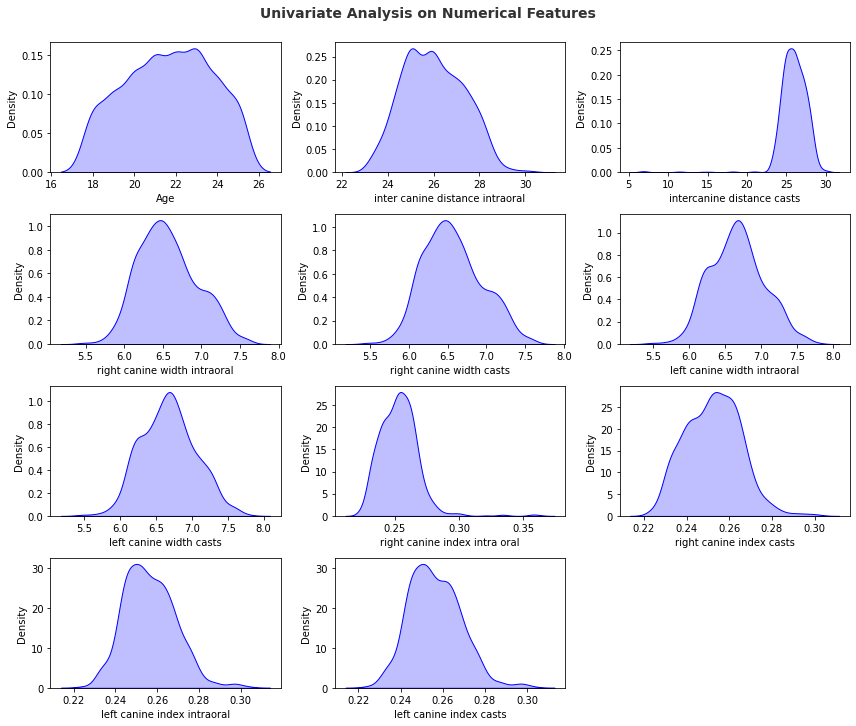

In [10]:
# Univariate Analysis on Numerical Features

#Set the figure size and title # alpha will control the transparency of the plot & y=1 the subtitple will be at the top of the figure & 0 will be at bottom
plt.figure(figsize = (12,12))
plt.suptitle('Univariate Analysis on Numerical Features', fontsize = 14, fontweight = "bold", alpha = 0.8, y = 1)

# loop through each numerical features and plot its density plot 
for i in range(0,len(num_features)): #0 represents the start of index since python starts with 0 index
    plt.subplot(5,3, i+1) #create a subplot for each feature
    sns.kdeplot(x = df[num_features [i]], shade = True, color = 'b') # kde is a density plot and shade will add color below the curve
    plt.xlabel(num_features[i]) # Add labels to x-axis
    plt.tight_layout()
    
# Save the plot
#plt.savefig('./images/univariate_analysis.png') 

In [11]:
# example of len 

my_list=[1,2,3,4,5,6,7,8,9,10]
print(len(my_list))

10


In [12]:
# example of i+1 iteration since 5 is the range

'''In this example, range(5) generates a sequence of numbers from 0 to 4.
The loop then iterates through each of these numbers, adding 1 to the current value of i with i+1 and printing the result. 
This produces output that starts with "Loop iteration 1" and ends with "Loop iteration 5".'''
for i in range(5):
    print("loop iteration",i+1)

loop iteration 1
loop iteration 2
loop iteration 3
loop iteration 4
loop iteration 5


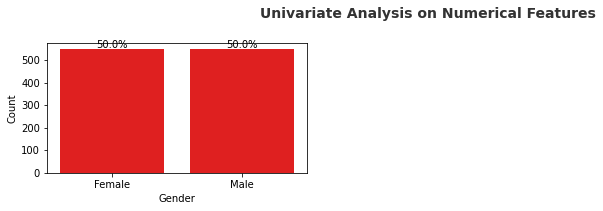

In [13]:
# Univariate Analysis on Numerical Features
plt.figure(figsize = (12,12))
plt.suptitle('Univariate Analysis on Numerical Features', fontsize = 14, fontweight = "bold", alpha = 0.8, y = 1)

for i in range(0,len(cat_features)):
    plt.subplot(5,3, i+1) #This sets the layout of the subplots with 5 rows and 3 columns, and selects the i+1th subplot to plot the next feature in the list.
    sns.countplot(x = df[cat_features[i]], color = 'r',data=df)#hue='Gender',data=df)
    plt.xlabel(cat_features[i])
    plt.ylabel('Count') # Add label to y-axis as Count
    plt.tight_layout()  #This adjusts the spacing between the subplots to prevent overlap.
    
    #Adding percentage for each category
    ax=plt.gca() # get current axis , a func from matplotlib, when called it will provide current axis instance on which the plot is drawn 
    
    '''In the code ax=plt.gca(), gca() is used to get the current axis instance and store it in the variable ax.
       This is done so that we can later use ax to add text labels to the plot using the text() method.'''
    
    total=len(df[cat_features[i]]) #This calculates the total count of the i-th categorical feature in the dataset.
for patch in ax.patches: #This starts a for loop that iterates over all the patches (bars) in the current axis.
    height=patch.get_height() #This gets the height of the current patch
    ax.text(patch.get_x()+patch.get_width()/2., height+3, '{:.1f}%'.format(100*height/total), ha='center')
    '''This adds text to the current patch. 
       It displays the percentage of the current patch with one decimal point and centers the text horizontally.
       The Patch class is used extensively throughout Matplotlib to draw shapes and other graphical elements on a plot'''
# Save the plot
#plt.savefig('./images/univariate_analysis.png')


The hue parameter in sns.countplot specifies a categorical variable in the DataFrame df that will be used to group the data by color. In this case, hue='Gender' means that the counts of each category in cat_features will be grouped by the gender of the individuals in the dataset. For example, if cat_features[i] corresponds to the feature 'education', then the count of individuals in each category of education level will be displayed for both males and females separately, with males and females represented by different colors

In [14]:
(df[cat_features].value_counts()/len(df[cat_features]))*100

Gender
Female    50.0
Male      50.0
dtype: float64

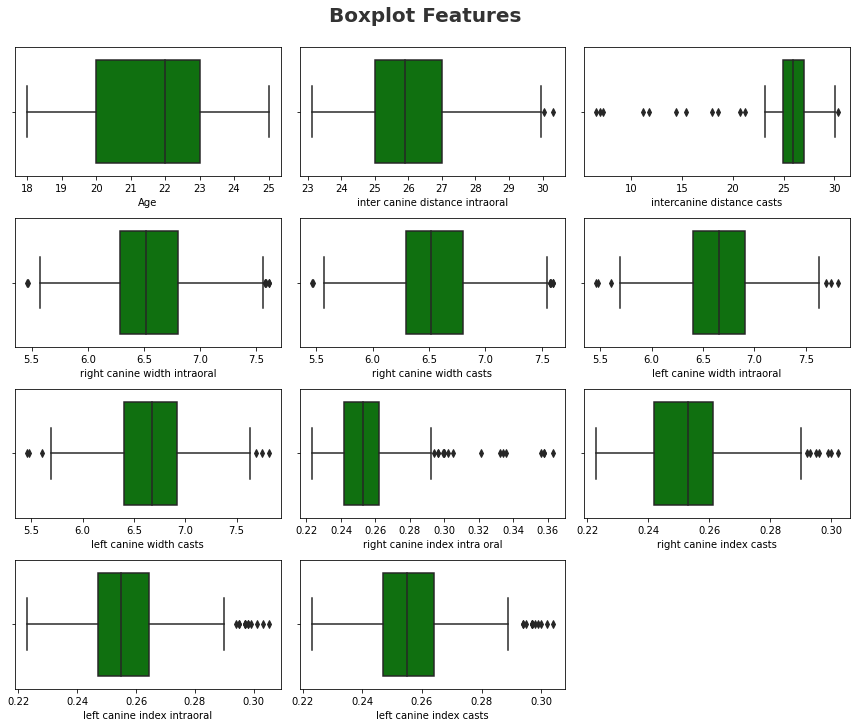

In [15]:
# Boxplot to find out the outlier
plt.figure(figsize=(12,12))
plt.suptitle("Boxplot Features ",fontsize = 20, fontweight = 'bold',alpha = 0.8, y =1)

for i in range (0,len(num_features)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x = df[num_features[i]],color = 'g')
    plt.xlabel(num_features[i])
    plt.tight_layout()

In [16]:
# Simple approach to convert the two list i.e num_features and cat_features into two dataframes which is x and y

#x=pd.DataFrame(df[num_features])
#y=pd.DataFrame(df[cat_features])

In [17]:

# create the two data frames using a loop
dfs={} # create an empty dict to store the resulting DataFrames 
for feature_type, features in zip(['numerical','categorical'],[num_features,cat_features]):    #zip function is used to iterate over two list i.e num_features and cat_features
    dfs[feature_type]=pd.DataFrame(df[features])
   
 # Assign the resulting DataFrames to x and y
    if feature_type=='numerical':
        x=dfs[feature_type]
    else:
        y=dfs[feature_type]

>Note: 
    feature_type and features. 
    >>feature_type corresponds to the current feature type ('numerical' or 'categorical'), 
    >>while features corresponds to the list of column names associated with that feature type (num_features or cat_features).

In [18]:
# print the data frames

#print('Numerical features:\n', x)
#print('Categorical features:\n', y)

In [19]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1100.0,21.625455,2.085892,18.000,20.0000,22.000,23.00000,25.000
inter canine distance intraoral,1100.0,25.989009,1.315292,23.120,25.0000,25.900,26.99250,30.310
intercanine distance casts,1100.0,25.880082,1.862323,6.540,24.9800,25.900,27.00000,30.310
right canine width intraoral,1100.0,6.563000,0.379035,5.460,6.2900,6.520,6.80250,7.610
right canine width casts,1100.0,6.564491,0.377553,5.460,6.3000,6.520,6.80250,7.600
left canine width intraoral,1100.0,6.669627,0.375841,5.460,6.4000,6.660,6.91000,7.810
left canine width casts,1100.0,6.675018,0.377098,5.460,6.4075,6.680,6.92000,7.810
right canine index intra oral,1100.0,0.253122,0.015344,0.223,0.2420,0.253,0.26200,0.363
right canine index casts,1100.0,0.252355,0.012892,0.223,0.2420,0.253,0.26125,0.302
left canine index intraoral,1100.0,0.256453,0.012355,0.223,0.2470,0.255,0.26425,0.305


>**1.** *The average age of the individuals in the data is approx 21* 

>**2.** *There SD of age is is approx 2.09 which means there is some variation in the ages of the individuals in the dataset*

>**3.** *The min age in the dataset is 18*

>**4.** *The max age in the dataset is 25*

>**5.** *The 25th percentile of age is 20 years, while the 50th percentile (median) is 22 years. This indicates that the majority of individuals in the dataset are between 20 and 22 years old.*

>**6.** *The 75th percentile of age is 23 years, which indicates that only a few individuals in the dataset are older than 23 years.*

```
Standard Deviation = sqrt( sum( (x - mean)^2 ) / (n - 1) )
```
>A standard deviation of 2.08 indicates that the data points in the dataset are, on average, about 2.08 units away from the mean value. This means that there is some degree of variability or spread in the data, but it is not very high.

>For example, if the mean age of a group of people is 21.63 years with a standard deviation of 2.08, we can expect that most people in the group have an age that is within two standard deviations from the mean, or between approximately 17.45 years and 25.81 years. This range covers about 95% of the data in a normal distribution.

>In general, the higher the standard deviation, the more spread out the data is and the less confidence we have in making predictions or generalizations about the data. A low standard deviation indicates that the data points are clustered closely around the mean, which makes it easier to make predictions or generalizations about the data.

# We can call the package to encode the categorical variable

>from sklearn.preprocessing import LabelEncoder;
>>LE = LabelEncoder();
>>>df["Gender"] = LE.fit_transform(df["Gender"]) 

In [20]:
# Mapping method is being used to encode the target variable

gender_map={"Female":0,"Male":1}
y['Gender']=y['Gender'].map(gender_map)
y['Gender']=y['Gender'].astype(int)
y['Gender'].dtypes

dtype('int32')

In [21]:
# full correlation table
x.corr().style.background_gradient(cmap='viridis')

,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
Age,1.000000,0.071300,0.033494,0.243534,0.241017,0.162094,0.167698,0.101415,0.199058,0.112364,0.109734
inter canine distance intraoral,0.071300,1.000000,0.755648,0.564793,0.566652,0.601423,0.590075,-0.382836,-0.352744,-0.343861,-0.338299
intercanine distance casts,0.033494,0.755648,1.000000,0.400577,0.402120,0.435529,0.357952,-0.308260,-0.297661,-0.283392,-0.279846
right canine width intraoral,0.243534,0.564793,0.400577,1.000000,0.999832,0.941932,0.937016,0.434863,0.570471,0.506583,0.510783
right canine width casts,0.241017,0.566652,0.402120,0.999832,1.000000,0.943088,0.938069,0.432951,0.568764,0.506022,0.510247
left canine width intraoral,0.162094,0.601423,0.435529,0.941932,0.943088,1.000000,0.994120,0.341201,0.473677,0.540797,0.545525
left canine width casts,0.167698,0.590075,0.357952,0.937016,0.938069,0.994120,1.000000,0.346256,0.479567,0.546163,0.551036
right canine index intra oral,0.101415,-0.382836,-0.308260,0.434863,0.432951,0.341201,0.346256,1.000000,0.876839,0.799557,0.798836
right canine index casts,0.199058,-0.352744,-0.297661,0.570471,0.568764,0.473677,0.479567,0.876839,1.000000,0.922306,0.921592
left canine index intraoral,0.112364,-0.343861,-0.283392,0.506583,0.506022,0.540797,0.546163,0.799557,0.922306,1.000000,0.999323


In [22]:

def correlation_heatmap(x):
    """
    Plots a correlation heatmap for a given dataframe.
    """
    # Calculate correlation matrix
    corr_matrix = x.corr()

    # Set up heatmap
    sns.set(style="darkgrid")#white, dark, whitegrid, darkgrid, ticks sets the background theme
    fig, ax = plt.subplots(figsize=(10, 8))


    # Plot heatmap
    sns.heatmap(corr_matrix, fmt = '.0%' , annot=True,
                cmap='viridis',linewidths=.5
                )

    # Set title
    ax.set_title("Correlation Heatmap")

    # Show plot
    plt.show()


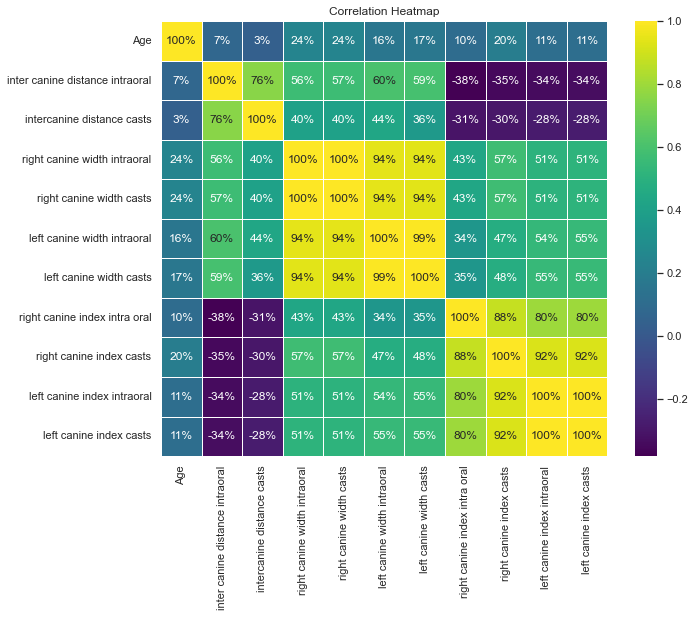

In [23]:
correlation_heatmap(x)

# Checking Correlation between Numerical Features
When dealing with a dataset containing numerical features, it can be helpful to check for correlations between these features. Correlation is a statistical measure that indicates how closely two variables are related. In the context of feature engineering, checking for correlations between numerical features can help identify redundant or highly related features, which can be removed or combined to simplify the dataset.

# Benefits of using functions
>Reusability: Once you've defined the function, you can reuse it with different datasets, making it a versatile tool that can save time and effort.

>Modularity: By breaking down a larger task into smaller, modular pieces (i.e., functions), you can make your code easier to understand and maintain. It also makes it easier to update or change the code if necessary.

>Abstraction: By defining a function, you can abstract away some of the complexity of the underlying code. This can make it easier for others (and yourself!) to use the function without needing to understand all the details of how it works.

>Consistency: If you have multiple scripts or notebooks that need to generate correlation heatmaps, defining a function ensures that they all produce the same type of plot with the same options and styling.

>Overall, creating a function for a task like creating a correlation heatmap can save time, promote code reuse and consistency, and make your code easier to understand and maintain.

In [24]:
# MinMax Sclaer is used being to scale down the data between 0 & 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
normalized_df=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [25]:
normalized_df.head()

,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,0.857143,0.269819,0.778713,0.288372,0.289720,0.268085,0.272340,0.135714,0.240506,0.231707,0.222222
1,0.571429,0.369958,0.809844,0.311628,0.313084,0.370213,0.370213,0.100000,0.177215,0.292683,0.296296
2,0.714286,0.098748,0.727387,0.209302,0.233645,0.348936,0.348936,0.178571,0.316456,0.500000,0.506173
3,0.285714,0.417246,0.823727,0.288372,0.289720,0.468085,0.468085,0.064286,0.113924,0.329268,0.333333
4,0.285714,0.450626,0.835928,0.293023,0.294393,0.442553,0.442553,0.057143,0.101266,0.280488,0.283951


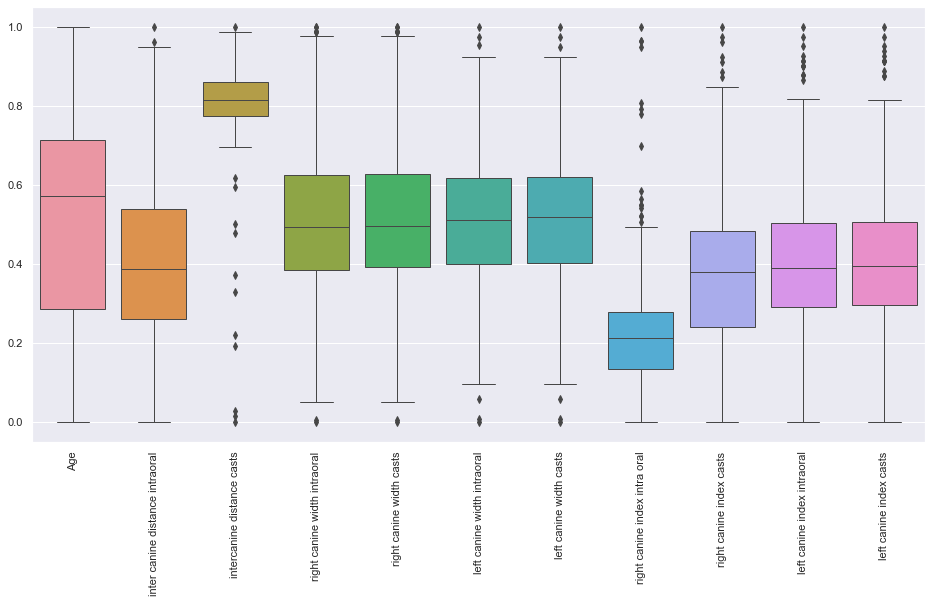

In [26]:
# Checking the outliers of MinMax Scaler data

fig = plt.figure(figsize =(16, 8))
sns.boxplot(data= normalized_df, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()

In [27]:
# Use StandardScaler to standardize the data i.e range (-1 +1)
from sklearn.preprocessing import StandardScaler
standardized=StandardScaler()
standardized_df=pd.DataFrame(standardized.fit_transform(x),columns=x.columns)

In [28]:
standardized_df.head()

,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1.138902,-0.706635,-0.445927,-1.274870,-1.283825,-1.542915,-1.525546,-0.725166,-0.803515,-1.170283,-1.241960
1,0.179643,-0.158979,-0.048393,-1.142895,-1.151332,-0.904057,-0.915347,-1.051176,-1.191516,-0.765417,-0.756848
2,0.659272,-1.642214,-1.101321,-1.723581,-1.601806,-1.037152,-1.047999,-0.333953,-0.337914,0.611127,0.617636
3,-0.779616,0.099636,0.128886,-1.274870,-1.283825,-0.291818,-0.305148,-1.377187,-1.579518,-0.522498,-0.514292
4,-0.779616,0.282188,0.284676,-1.248475,-1.257326,-0.451532,-0.464330,-1.442389,-1.657118,-0.846390,-0.837700


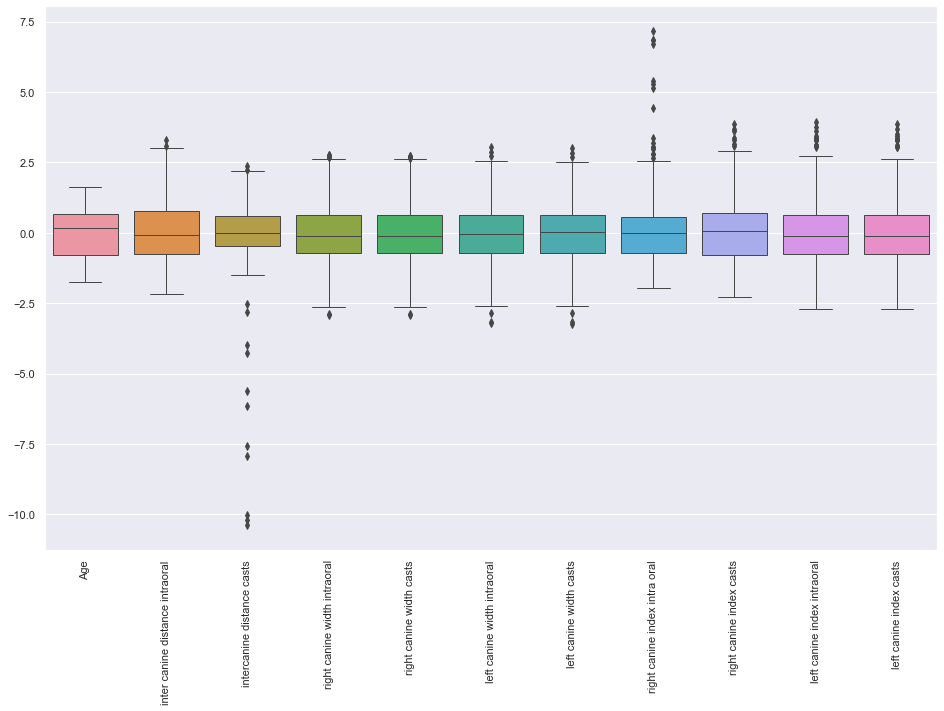

In [29]:
# Checking the outliers of StandardScaler Data
fig = plt.figure(figsize =(16, 10))
sns.boxplot(data= standardized_df, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()

# Capping method approach with Normalized data

In [30]:
def replace_outliers_nrm(normalized_df,columns):
    for col in columns:
  
        
        Q1=normalized_df[col].quantile(0.25)
        Q3=normalized_df[col].quantile(0.75)

        IQR=Q3-Q1
        
        lower_bound=Q1 - 1.5*IQR
        upper_bound=Q3 + 1.5*IQR
        
        #replace min and max value with lower_bound and upper_bound
        
        normalized_df.loc[(normalized_df[col]>upper_bound),col] = upper_bound
        normalized_df.loc[(normalized_df[col]<lower_bound),col] = lower_bound
        
    return normalized_df

In [31]:
# Call the function to replace the outliers

cols_with_outliers=['Age', 'inter canine distance intraoral', 'intercanine distance casts',
       'right canine width intraoral', 'right canine width casts',
       'left canine width intraoral', 'left canine width casts',
       'right canine index intra oral', 'right canine index casts',
       'left canine index intraoral', 'left canine index casts']

normalized_df=replace_outliers_nrm(normalized_df,cols_with_outliers)

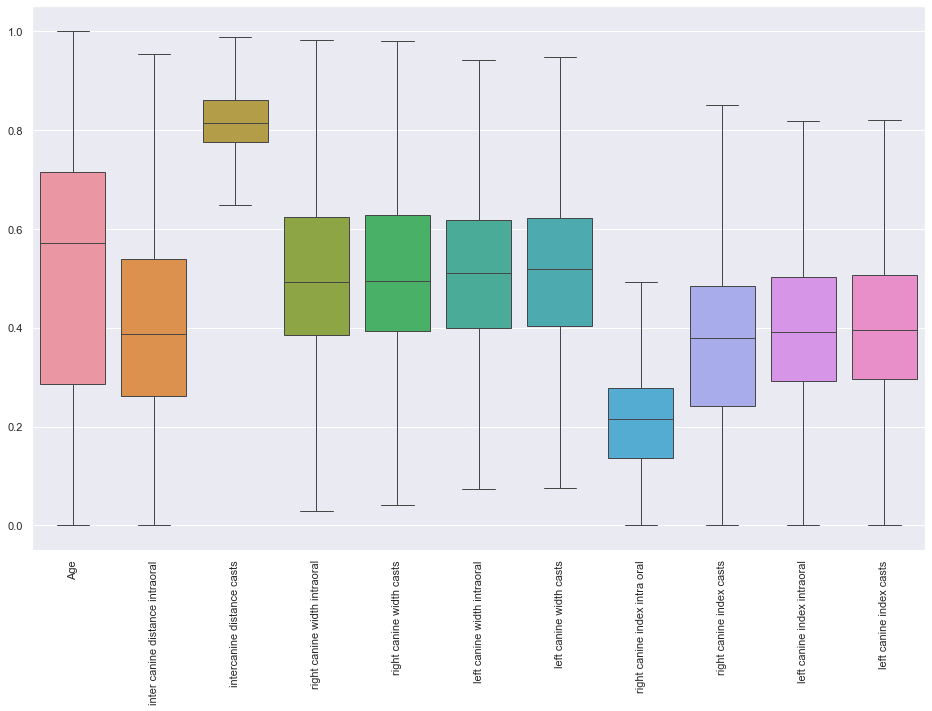

In [32]:
fig = plt.figure(figsize =(16, 10))
sns.boxplot(data= normalized_df, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()

# Capping Method approach with Standardized Data

In [33]:
def replace_outliers_st(standardized_df,columns):
    for col in columns:
        Q1=standardized_df[col].quantile(0.25)
        Q3=standardized_df[col].quantile(0.75)
        
 

        IQR=Q3-Q1
        
        lower_bound=Q1 - 1.5*IQR
        upper_bound=Q3 + 1.5*IQR
        
        #replace min and max value with lower_bound and upper_bound
        standardized_df.loc[(standardized_df[col]>upper_bound),col] = upper_bound
        standardized_df.loc[(standardized_df[col]<lower_bound),col] = lower_bound

        
    return standardized_df

In [34]:
# Columns to replace
columns=['inter canine distance intraoral', 'intercanine distance casts',
       'right canine width intraoral', 'right canine width casts',
       'left canine width intraoral', 'left canine width casts',
       'right canine index intra oral', 'right canine index casts',
       'left canine index intraoral', 'left canine index casts']


# call the function
standardized_df = replace_outliers_st(standardized_df, columns)


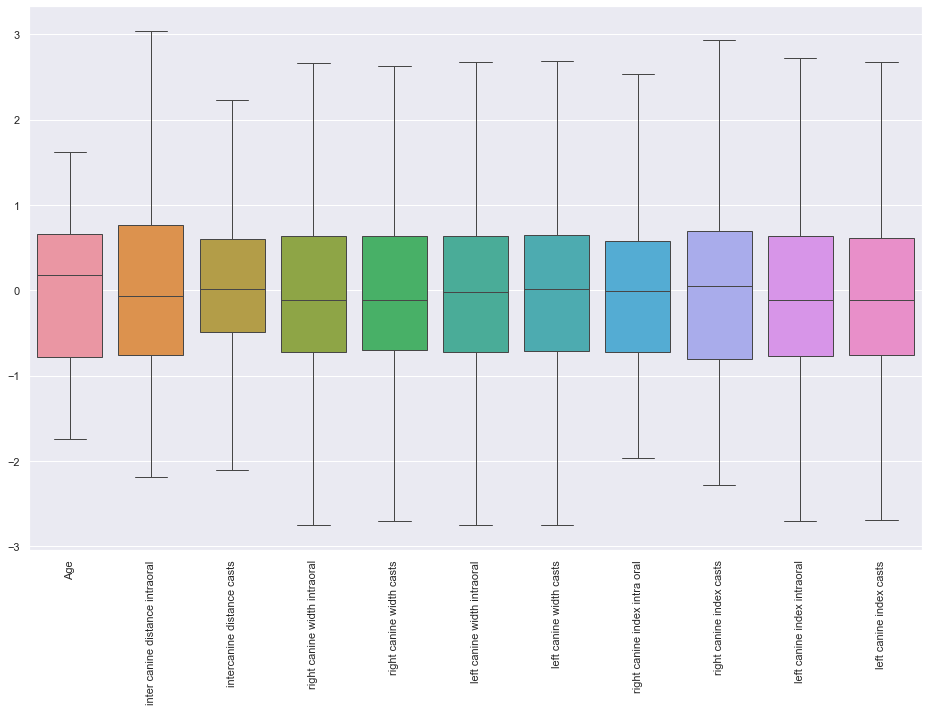

In [35]:
fig = plt.figure(figsize =(16, 10))
sns.boxplot(data= standardized_df, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()

In [36]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='box-cox')
X_transformed=pt.fit_transform(normalized_df+0.000001)

In [37]:
pd.DataFrame({'cols':normalized_df.columns,'box-cox_lambdas':pt.lambdas_})

,cols,box-cox_lambdas
0,Age,0.482979
1,inter canine distance intraoral,0.728664
2,intercanine distance casts,1.037377
3,right canine width intraoral,0.650434
4,right canine width casts,0.643292
5,left canine width intraoral,0.790649
6,left canine width casts,0.808603
7,right canine index intra oral,0.689129
8,right canine index casts,0.759760
9,left canine index intraoral,0.683717


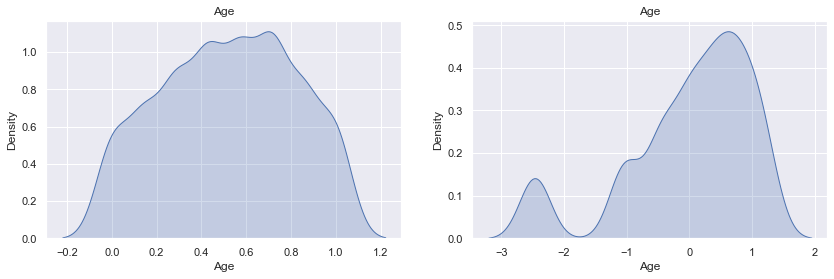

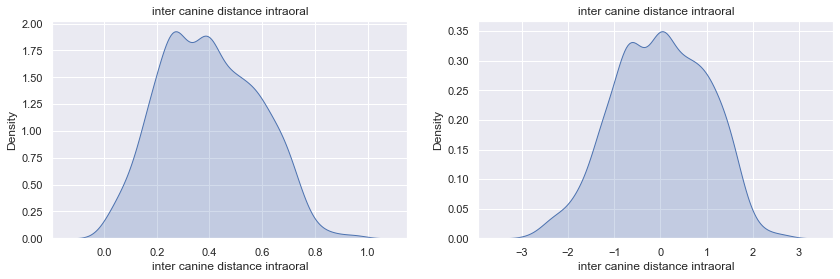

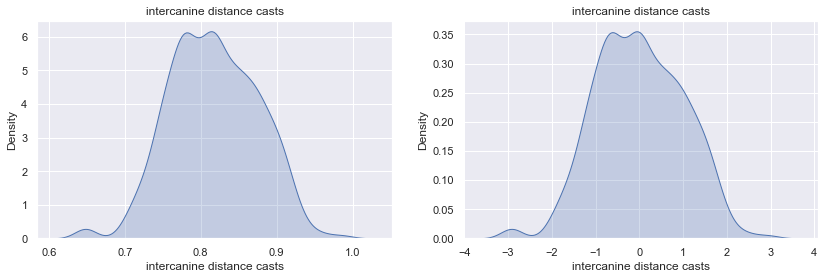

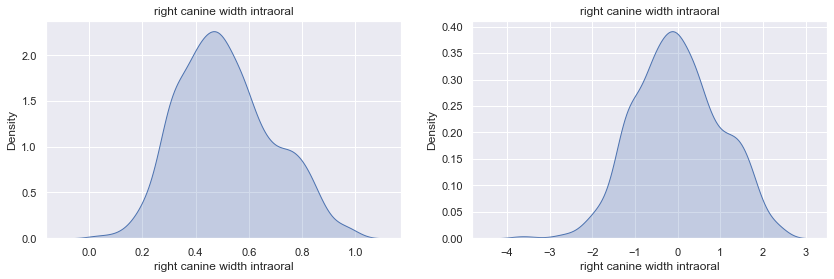

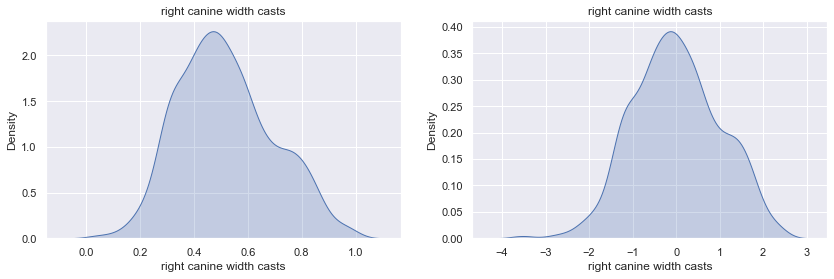

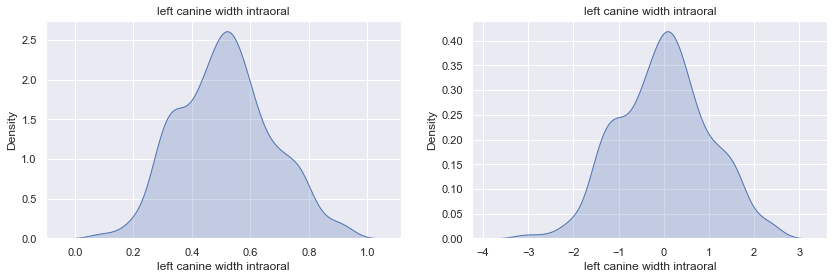

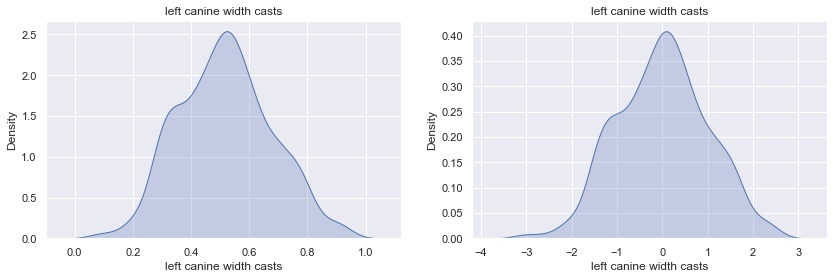

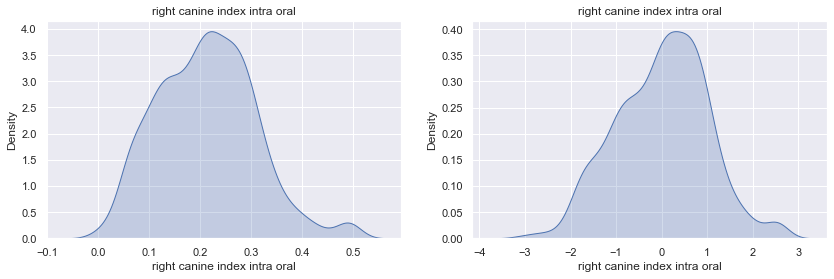

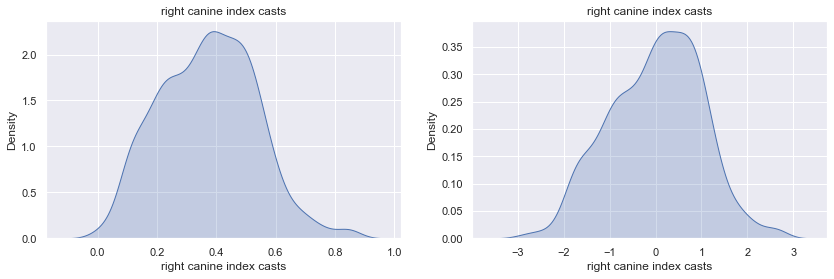

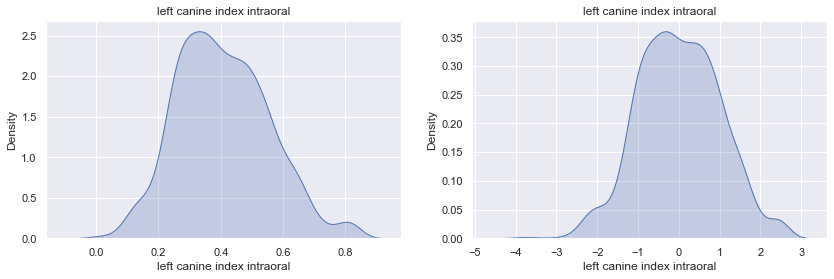

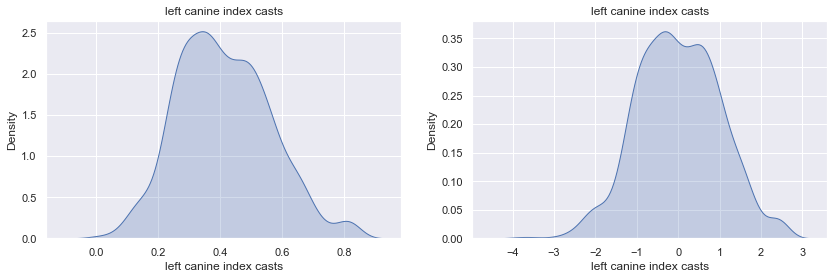

In [38]:
# Before and after Box-cox transformations
X_transformed=pd.DataFrame(X_transformed,columns=normalized_df.columns)

for col in X_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(normalized_df[col],shade=True)
    plt.title(col)
    
    
    plt.subplot(122)
    sns.kdeplot(X_transformed[col],shade=True)
    plt.title(col)
    
    plt.show()

In [39]:
from scipy.stats import yeojohnson
from sklearn.preprocessing import power_transform

In [40]:
cols_to_transform=['inter canine distance intraoral',
       'intercanine distance casts', 'right canine width intraoral',
       'right canine width casts', 'left canine width intraoral',
       'left canine width casts', 'right canine index intra oral',
       'right canine index casts', 'left canine index intraoral',
       'left canine index casts']

for col in cols_to_transform:
    if col in x.columns:
        x[[col]]=power_transform(x[[col]],method='yeo-johnson')
        

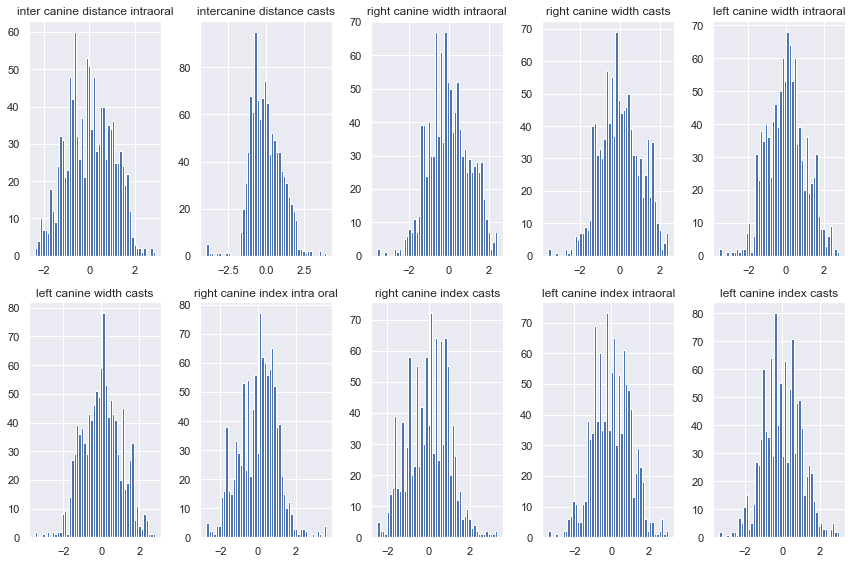

In [41]:
import matplotlib.pyplot as plt

# Plot histograms of the transformed columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 8))
for col, ax in zip(cols_to_transform, axes.flatten()):
    if col in x.columns:
        ax.hist(x[col], bins=50)
        ax.set_title(col)
plt.tight_layout()
plt.show()


# Feature Selection method for best features 

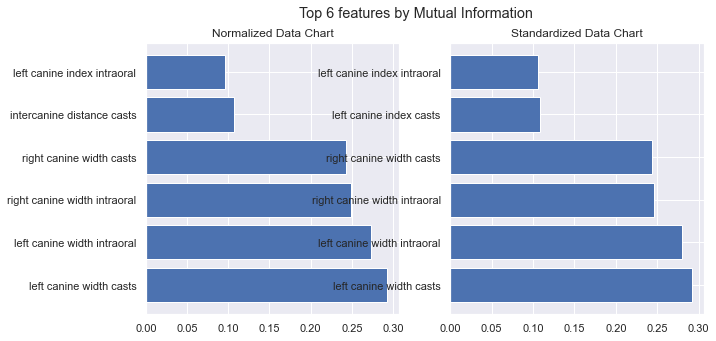

In [42]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information for normalized_df & standardized_df
normalized_mi=mutual_info_classif(normalized_df,y)
standardized_mi=mutual_info_classif(standardized_df,y)


# Create pandas data series for each dataset
normalized_data= pd.Series(normalized_mi,index=normalized_df.columns)
standardized_data=pd.Series(standardized_mi,index=standardized_df.columns)

# Sort series by descending order of mutual information and select the top 6 features
normalized_top6=normalized_data.nlargest(6)
standardized_top6=standardized_data.nlargest(6)

# Create a figure with two columns of subplots
fig,axs= plt.subplots(nrows=1,ncols=2,figsize=(10,5))

# Plot normalized_df data on the left side
axs[0].barh(normalized_top6.index,normalized_top6.values)
axs[0].set_title("Normalized Data Chart")


# Plot standardized_df data on the right side
axs[1].barh(standardized_top6.index,standardized_top6.values)
axs[1].set_title("Standardized Data Chart")


# Set a title of the figure
fig.suptitle("Top 6 features by Mutual Information")

# Display the plot
plt.show()

# Model Building

In [43]:
# import the packages

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [44]:
# Create a new DataFrame with the top 6 features from normalized data
normalized_top6_df = normalized_df[normalized_top6.index]

# Create a new DataFrame with the top 6 features from standardized data
standardized_top6_df = standardized_df[standardized_top6.index]


# Model Building with Normalized_df data

In [45]:
# Split the dataframe into training and testing
X_train,X_test,y_train,y_test=train_test_split(normalized_top6_df,y,test_size=0.2,random_state=42)



# Create instances of the classification algorithms

models={'LogisticRegression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'xgboost':XGBClassifier(),
    'catboost':CatBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'GaussianNB': GaussianNB(),
    'SVC' : SVC()}





def evaluation_norm(true, predict):
    accuracy = accuracy_score(true, predict)
    precision = precision_score(true, predict )
    recall = recall_score(true, predict)
    f1 = f1_score(true, predict)
    confusion = confusion_matrix(true, predict)
    
    return accuracy, precision, recall, f1, confusion


results_norm = {}  # dictionary to store the performance metrics for each model

for name, model in models.items():
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the performance of the model
    accuracy, precision, recall, f1, confusion = evaluation_norm(y_test, y_pred)
    
    # Store the performance metrics in the results dictionary
    results_norm[name] = {'accuracy': accuracy,
                     'precision': precision,
                     'recall': recall,
                     'f1': f1,
                     'confusion': confusion}
    
    # Print the performance metrics for the model
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    print(f"Confusion matrix:\n{confusion}\n")



LogisticRegression:
Accuracy: 0.79
Precision: 0.79
Recall: 0.77
F1 score: 0.78
Confusion matrix:
[[91 22]
 [25 82]]

KNN:
Accuracy: 0.85
Precision: 0.83
Recall: 0.85
F1 score: 0.84
Confusion matrix:
[[95 18]
 [16 91]]

DecisionTreeClassifier:
Accuracy: 0.85
Precision: 0.84
Recall: 0.86
F1 score: 0.85
Confusion matrix:
[[96 17]
 [15 92]]

RandomForestClassifier:
Accuracy: 0.90
Precision: 0.90
Recall: 0.91
F1 score: 0.90
Confusion matrix:
[[102  11]
 [ 10  97]]

AdaBoostClassifier:
Accuracy: 0.81
Precision: 0.78
Recall: 0.86
F1 score: 0.82
Confusion matrix:
[[87 26]
 [15 92]]

xgboost:
Accuracy: 0.88
Precision: 0.87
Recall: 0.88
F1 score: 0.87
Confusion matrix:
[[99 14]
 [13 94]]

Learning rate set to 0.009755
0:	learn: 0.6853693	total: 148ms	remaining: 2m 27s
1:	learn: 0.6777312	total: 150ms	remaining: 1m 15s
2:	learn: 0.6700272	total: 153ms	remaining: 50.8s
3:	learn: 0.6618175	total: 155ms	remaining: 38.7s
4:	learn: 0.6548053	total: 158ms	remaining: 31.4s
5:	learn: 0.6484786	total: 160

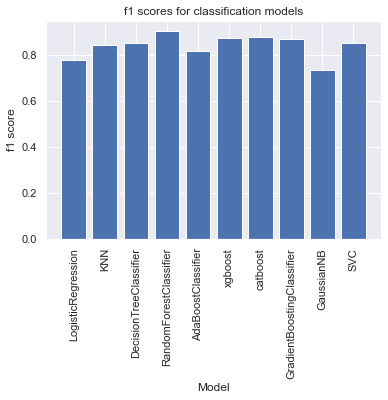

In [46]:
# Create a bar chart of f1 score for each model

f1_scores=[results_norm[name]['f1'] for name in models.keys()]
plt.bar(models.keys(),f1_scores,linewidth=1)
plt.title("f1 scores for classification models")
plt.xlabel("Model")
plt.ylabel("f1 score")
plt.xticks(rotation=90)
plt.show()

In [47]:
# convert the results disctionary to pandas dataframe for normalized datasets

df_results_norm=pd.DataFrame.from_dict(results_norm,orient='index').drop('confusion',axis=1).sort_values(by='f1',ascending=False)

print(df_results_norm)

                            accuracy  precision    recall        f1
RandomForestClassifier      0.904545   0.898148  0.906542  0.902326
catboost                    0.881818   0.871560  0.887850  0.879630
xgboost                     0.877273   0.870370  0.878505  0.874419
GradientBoostingClassifier  0.872727   0.862385  0.878505  0.870370
SVC                         0.859091   0.865385  0.841121  0.853081
DecisionTreeClassifier      0.854545   0.844037  0.859813  0.851852
KNN                         0.845455   0.834862  0.850467  0.842593
AdaBoostClassifier          0.813636   0.779661  0.859813  0.817778
LogisticRegression          0.786364   0.788462  0.766355  0.777251
GaussianNB                  0.750000   0.760000  0.710280  0.734300


In [48]:
# Randomsearch CV on RandomForestclassifier

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,KFold
from scipy.stats import randint # we use randint to search over each hyperparameters


params= {'n_estimators': randint(100,1000),
        'criterion':['gini','entropy'],
        'min_samples_split': randint(1,10),
        'min_samples_leaf': randint(1,10),
        'max_leaf_nodes': randint(4,100)}

rs1=RandomizedSearchCV(RandomForestClassifier(n_jobs=-1),params,n_iter=50,n_jobs=-1,cv=KFold(n_splits=3),scoring='roc_auc')
rs1.fit(X_train,y_train)


print('Best score:',rs1.best_score_)
print('Best paramter:',rs1.best_params_)

Best score: 0.9430782476142753
Best paramter: {'criterion': 'entropy', 'max_leaf_nodes': 73, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 851}


In [49]:
# Create a new Random forest classifier object with the best parameters
rfc=RandomForestClassifier(criterion='entropy',max_leaf_nodes= 63,
                           min_samples_leaf=1, min_samples_split= 3, n_estimators= 300)


# fit the model on the training data
rfc.fit(X_train,y_train)

# use the model to predict on the test data
y_pred=rfc.predict(X_test)

# Evaluate the model's performance like acc,prec,recall,f1

accuracy= accuracy_score(y_test,y_pred)
precision= precision_score(y_test,y_pred)
recall= recall_score(y_test,y_pred)
f1= f1_score(y_test,y_pred)


print('Accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1:',f1)




Accuracy: 0.8818181818181818
precision: 0.8785046728971962
recall: 0.8785046728971962
f1: 0.8785046728971962


In [50]:
import pickle 
pickle.dump(normalized_top6_df,open('normalized_top6_df_v1.pkl','wb'))

pickle.dump(rfc,open('rfc.pkl','wb'))

In [51]:
normalized_top6_df.columns

Index(['left canine width casts', 'left canine width intraoral',
       'right canine width intraoral', 'right canine width casts',
       'intercanine distance casts', 'left canine index intraoral'],
      dtype='object')